<a href="https://colab.research.google.com/github/Tasnia16EEE/Feature-Importance-of-Mask2Former-Model/blob/main/Mask2FormerFeatureimportance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the necessary dependencies
!pip install datasets -qq
!pip install evaluate -qq
!pip install albumentations -qq
!pip install git+https://github.com/huggingface/transformers.git -qq

# We will use this to push our trained model to HF Hub
!pip install huggingface_hub -qq

!pip install gpustat

In [ ]:
# Import the necessary packages
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import albumentations as A
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import (
    MaskFormerConfig,
    MaskFormerImageProcessor,
    MaskFormerModel,
    MaskFormerForInstanceSegmentation,
    Mask2FormerConfig,
    Mask2FormerImageProcessor,
    Mask2FormerModel,
    Mask2FormerForUniversalSegmentation,
)
import evaluate
from huggingface_hub import notebook_login

In [ ]:
 from huggingface_hub import login
 login(token="your_token")

In [ ]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
#import requests

from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation

processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-large-ade-semantic")
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-large-ade-semantic")



In [ ]:
from datasets import load_dataset
# Load dataset
dataset = load_dataset("scene_parse_150", trust_remote_code=True)
train_data = dataset['train']
test_data = dataset['test']
val_data = dataset['validation']


Generating train split:   0%|          | 0/20210 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3352 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
image = val_data[3,4]['image']
inputs = processor(images = image, return_tensors = 'pt')

In [ ]:
image2= val_data[:2]
background = processor(images = image, return_tensors = 'pt')

In [ ]:
print(background)

In [ ]:
# forward pass
with torch.no_grad():
  outputs = model(**inputs)



In [ ]:
image = train_data[1]['image']
inputs = processor(images = image, return_tensors = 'pt')
# Save the plot as an image file
plt.savefig('reference picture.png')
image


In [ ]:
!pip install -q pytorch-lightning --upgrade

In [ ]:
import pytorch_lightning as pl
class Mask2FormerModel(pl.LightningModule):
  def forward(self, output_hidden_states):
        return self.model(output_hidden_states)


In [ ]:
print(inputs['pixel_values'])

In [ ]:
with torch.no_grad():
    outputs = model(**inputs, output_hidden_states=True)


In [ ]:
# settings
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(outputs.encoder_last_hidden_state)

In [ ]:
print(outputs)

In [ ]:
tensor1 = outputs.masks_queries_logits.shape
tensor2 = outputs.encoder_last_hidden_state.shape
tensor3 = outputs.pixel_decoder_last_hidden_state.shape
tensor4 = outputs.encoder_hidden_states[0].shape
tensor5 = outputs.encoder_hidden_states[1].shape
tensor6 = outputs.encoder_hidden_states[2].shape
tensor7 = outputs.pixel_decoder_hidden_states[0].shape
tensor8 = outputs.pixel_decoder_hidden_states[1].shape
tensor9 = outputs.pixel_decoder_hidden_states[2].shape


In [ ]:
print(tensor1)
print(tensor2)
print(tensor3)
print(tensor4)
print(tensor5)
print(tensor6)
print(tensor7)
print(tensor8)
print(tensor9)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt

# Assuming feature_map is a 3D array with shape (1, 100, 256)
feature_map_to_visualize = outputs.class_queries_logits[0]  # Extracting the slice

# Plot the feature map as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(feature_map_to_visualize, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('class_queries_logits Feature Map')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()


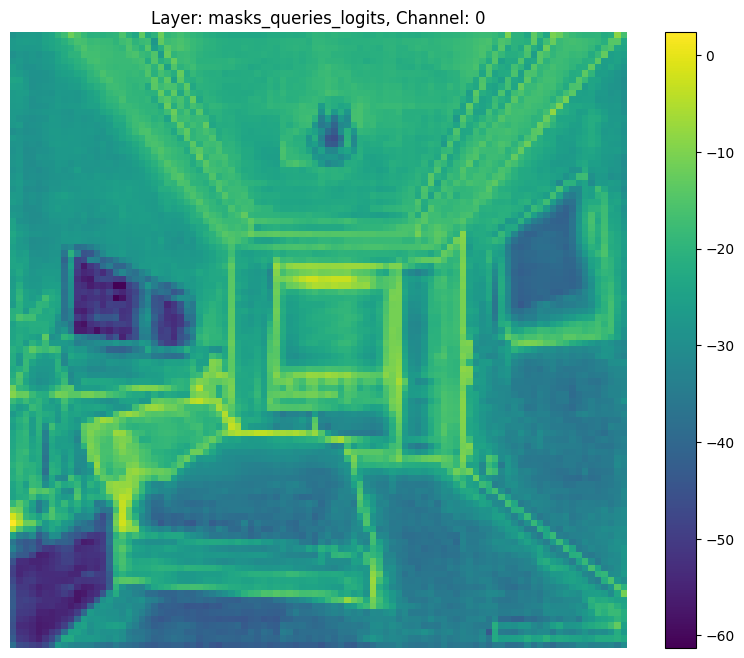

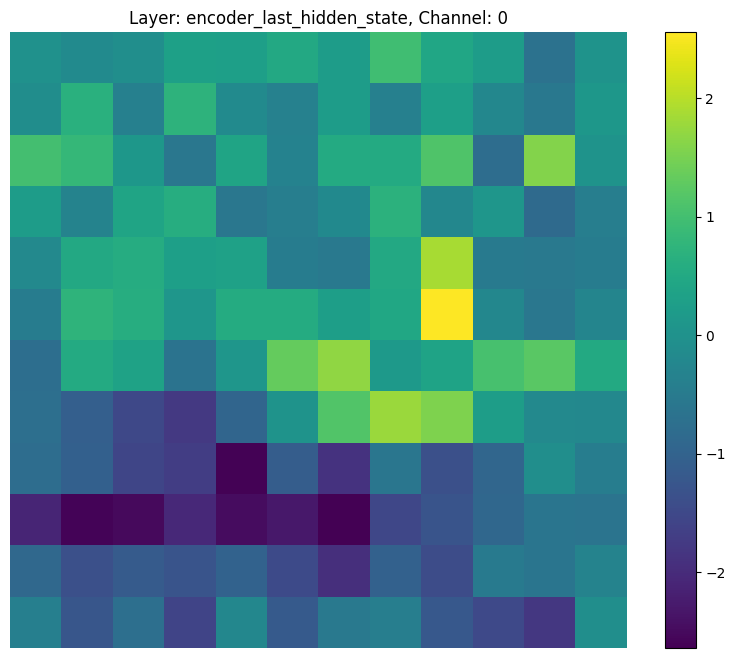

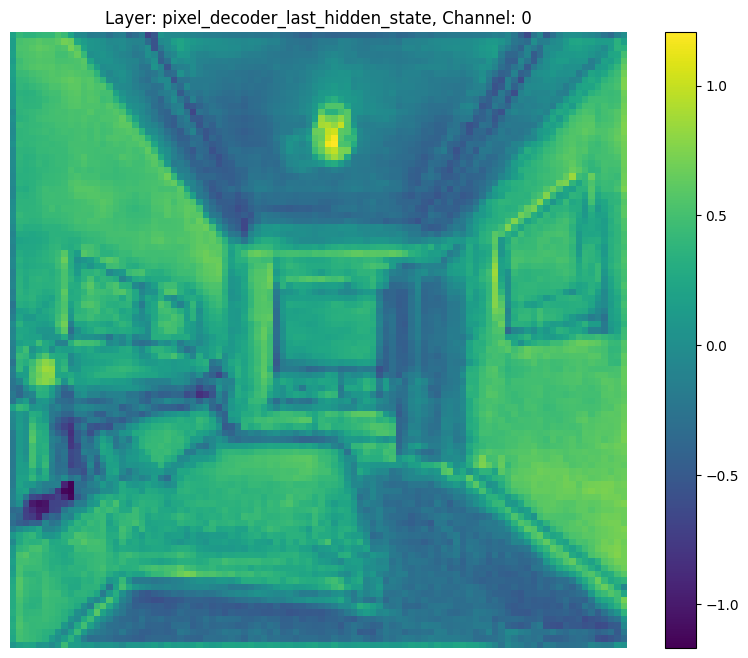

In [ ]:
# Extract features from intermediate layers
#intermediate_features = outputs

intermediate_features = {
    #'class_queries_logits':outputs.class_queries_logits,
    'masks_queries_logits':outputs.masks_queries_logits,
    'encoder_last_hidden_state': outputs.encoder_last_hidden_state,
    'pixel_decoder_last_hidden_state': outputs.pixel_decoder_last_hidden_state,
    #'transformer_decoder_last_hidden_state': outputs.transformer_decoder_last_hidden_state,
    #'encoder_hidden_states':outputs.encoder_hidden_states,
    #'pixel_decoder_hidden_states':outputs.pixel_decoder_hidden_states,
    #'transformer_decoder_hidden_states':outputs.transformer_decoder_hidden_states,
    #'transformer_decoder_intermediate_states':outputs.transformer_decoder_intermediate_states,
    #'masks_queries_logits':outputs.masks_queries_logits
}

# Visualize intermediate features
for layer_name, feature_map in intermediate_features.items():
    # Assuming feature_map is a tensor of shape (batch_size, num_channels, height, width)
    # You can choose which channel's feature map to visualize
    channel_to_visualize = 0
    feature_map_to_visualize = feature_map[0, channel_to_visualize].cpu().detach().numpy()
    #print(len(feature_map_to_visualize.shape))

    # Ensure the feature map has the correct shape for visualization
    if len(feature_map_to_visualize.shape) == 2:
        # Grayscale image
        plt.figure(figsize=(10, 8))
        plt.title(f'Layer: {layer_name}, Channel: {channel_to_visualize}')
        plt.imshow(feature_map_to_visualize, cmap='viridis')
        plt.colorbar()
        plt.axis('off')
        # Save the image
        plt.savefig(f'{layer_name}_channel_{channel_to_visualize}_color.png')
        plt.show()

    else:
        print(f"Cannot visualize feature map for {layer_name}. Invalid shape: {feature_map_to_visualize.shape}")

    # Plot the feature map
    #plt.figure(figsize=(8, 8))
    #plt.title(f'Layer: {layer_name}, Channel: {channel_to_visualize}')
    #plt.imshow(feature_map_to_visualize, cmap='viridis')
    #plt.colorbar()
    #plt.axis('off')
    #plt.show()

In [ ]:
print(outputs.transformer_decoder_last_hidden_state)

In [ ]:
# Assuming feature_map is a 3D array with shape (1, 100, 256)
feature_map_to_visualize = outputs.transformer_decoder_last_hidden_state[0]  # Extracting the slice

# Plot the feature map as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(feature_map_to_visualize, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Transformer Decoder Last Hidden State Feature Map')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()


In [ ]:
tensor1 = outputs.encoder_hidden_states[0]
tensor2 = outputs.encoder_hidden_states[1]
tensor3 = outputs.encoder_hidden_states[2]
encoder_hidden_states = (tensor1, tensor2, tensor3)
print(tensor1)

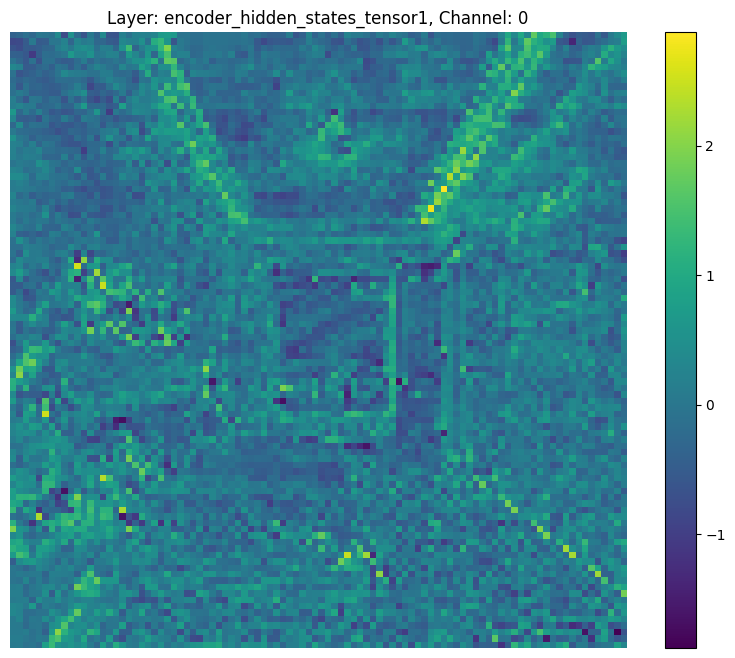

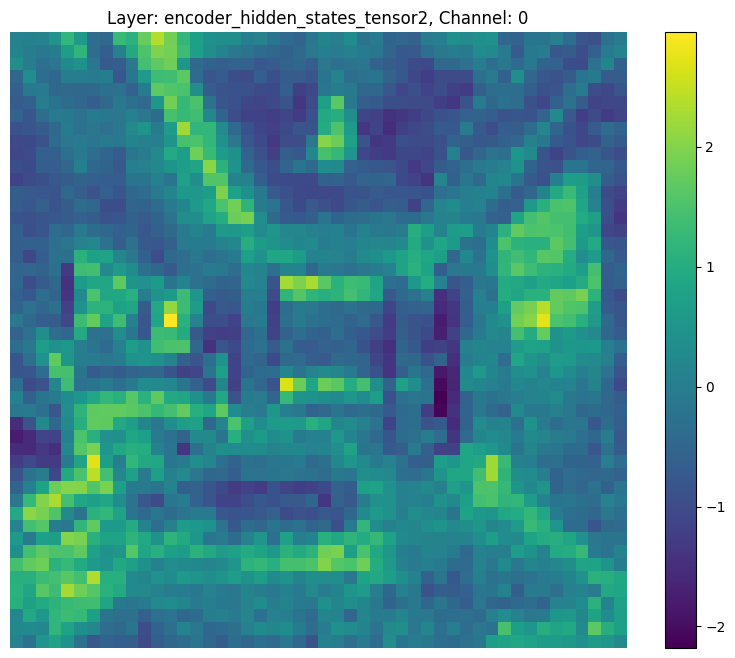

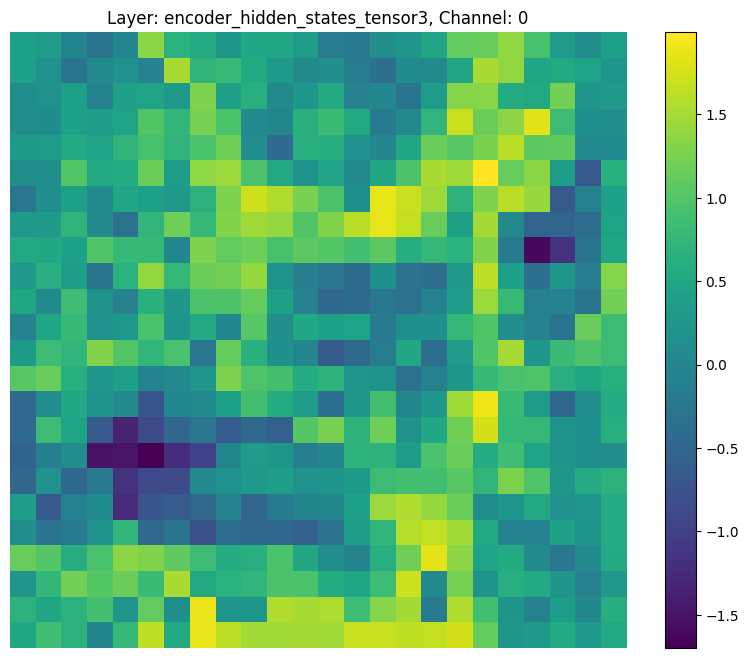

In [ ]:
intermediate_features = {
    'encoder_hidden_states_tensor1':tensor1,
    'encoder_hidden_states_tensor2':tensor2,
    'encoder_hidden_states_tensor3':tensor3
}

# Visualize intermediate features
for layer_name, feature_map in intermediate_features.items():
    # Assuming feature_map is a tensor of shape (batch_size, num_channels, height, width)
    # You can choose which channel's feature map to visualize
    channel_to_visualize = 0
    feature_map_to_visualize = feature_map[0, channel_to_visualize].cpu().detach().numpy()

    # Ensure the feature map has the correct shape for visualization
    if len(feature_map_to_visualize.shape) == 2:
        # Grayscale image
        plt.figure(figsize=(10, 8))
        plt.title(f'Layer: {layer_name}, Channel: {channel_to_visualize}')
        plt.imshow(feature_map_to_visualize, cmap='viridis')
        plt.colorbar()
        plt.axis('off')
        plt.savefig(f'{layer_name}_channel_{channel_to_visualize}_color.png')
        plt.show()
    else:
        print(f"Cannot visualize feature map for {layer_name}. Invalid shape: {feature_map_to_visualize.shape}")


In [ ]:
tensor1 = outputs.pixel_decoder_hidden_states[0]
tensor2 = outputs.pixel_decoder_hidden_states[1]
tensor3 = outputs.pixel_decoder_hidden_states[2]
pixel_decoder_hidden_states = (tensor1, tensor2, tensor3)
print(tensor1.shape)

torch.Size([1, 256, 12, 12])


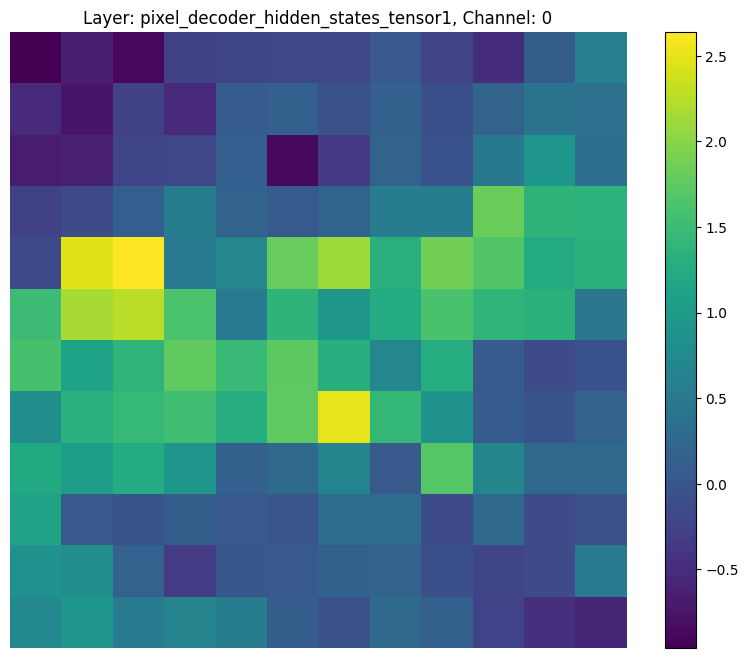

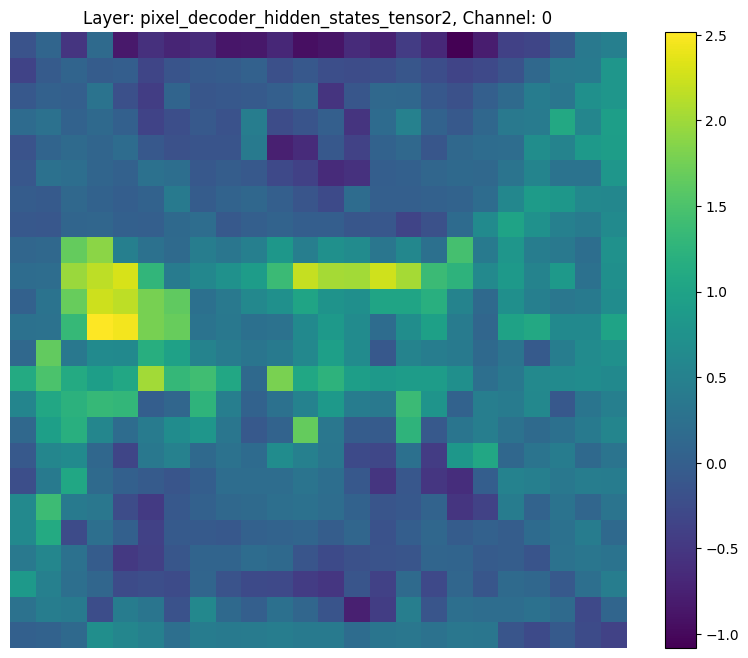

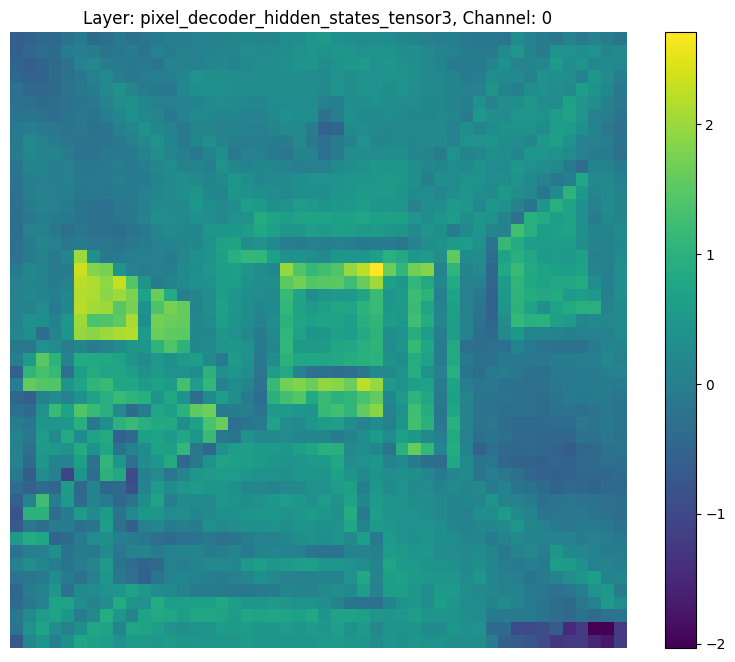

In [ ]:
intermediate_features = {
    'pixel_decoder_hidden_states_tensor1':tensor1,
    'pixel_decoder_hidden_states_tensor2':tensor2,
    'pixel_decoder_hidden_states_tensor3':tensor3,
}

# Visualize intermediate features
for layer_name, feature_map in intermediate_features.items():
    # Assuming feature_map is a tensor of shape (batch_size, num_channels, height, width)
    # You can choose which channel's feature map to visualize
    channel_to_visualize = 0
    feature_map_to_visualize = feature_map[0, channel_to_visualize].cpu().detach().numpy()

    # Ensure the feature map has the correct shape for visualization
    if len(feature_map_to_visualize.shape) == 2:
        # Grayscale image
        plt.figure(figsize=(10, 8))
        plt.title(f'Layer: {layer_name}, Channel: {channel_to_visualize}')
        plt.imshow(feature_map_to_visualize, cmap='viridis')
        plt.colorbar()
        plt.axis('off')
        plt.savefig(f'{layer_name}_channel_{channel_to_visualize}_color.png')
        plt.show()

    else:
        print(f"Cannot visualize feature map for {layer_name}. Invalid shape: {feature_map_to_visualize.shape}")

In [ ]:
tensor0 = outputs.transformer_decoder_hidden_states[0]
tensor1 = outputs.transformer_decoder_hidden_states[1]
tensor2 = outputs.transformer_decoder_hidden_states[2]
tensor3 = outputs.transformer_decoder_hidden_states[3]
tensor4 = outputs.transformer_decoder_hidden_states[4]
tensor5 = outputs.transformer_decoder_hidden_states[5]
tensor6 = outputs.transformer_decoder_hidden_states[6]
tensor7 = outputs.transformer_decoder_hidden_states[7]
tensor8 = outputs.transformer_decoder_hidden_states[8]
tensor9 = outputs.transformer_decoder_hidden_states[9]


In [ ]:
intermediate_features = {
    'transformer_decoder_hidden_states_tensor0':tensor0,
    'transformer_decoder_hidden_states_tensor1':tensor1,
    'transformer_decoder_hidden_states_tensor2':tensor2,
    'transformer_decoder_hidden_states_tensor3':tensor3,
    'transformer_decoder_hidden_states_tensor4':tensor4,
    'transformer_decoder_hidden_states_tensor5':tensor5,
    'transformer_decoder_hidden_states_tensor6':tensor6,
    'transformer_decoder_hidden_states_tensor7':tensor7,
    'transformer_decoder_hidden_states_tensor8':tensor8,
    'transformer_decoder_hidden_states_tensor9':tensor9,
}

# Visualize intermediate features
for layer_name, feature_map in intermediate_features.items():
    # Assuming feature_map is a tensor of shape (batch_size, num_channels, height, width)
    # You can choose which channel's feature map to visualize
    channel_to_visualize = 0
    feature_map_to_visualize = feature_map[0, channel_to_visualize].cpu().detach().numpy()

    # Ensure the feature map has the correct shape for visualization
    if len(feature_map_to_visualize.shape) == 2:
        # Grayscale image
        plt.figure(figsize=(8, 8))
        plt.title(f'Layer: {layer_name}, Channel: {channel_to_visualize}')
        plt.imshow(feature_map_to_visualize, cmap='viridis')
        plt.colorbar()
        plt.axis('off')
        plt.show()
    elif len(feature_map_to_visualize.shape) == 3:
        # Assuming it's a color image, you may need to specify the channel
        # You can choose the channel you want to visualize
        channel_to_visualize = 0
        plt.figure(figsize=(8, 8))
        plt.title(f'Layer: {layer_name}, Channel: {channel_to_visualize}')
        plt.imshow(feature_map_to_visualize[:, :, channel_to_visualize], cmap='viridis')
        plt.colorbar()
        plt.axis('off')
        plt.show()
    else:
        print(f"Cannot visualize feature map for {layer_name}. Invalid shape: {feature_map_to_visualize.shape}")